In [1]:
import sklearn as skl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame as df
from sklearn.preprocessing import MinMaxScaler as mns

from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score as cvs

from sklearn.linear_model import LinearRegression as lr
from sklearn.linear_model import Lasso as L
from sklearn.linear_model import ElasticNet as en

from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import mean_squared_error, r2_score as r2
from sklearn import model_selection as mods
from sklearn.svm import SVR as svr
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import json as js #first imported all the necessary modules
import csv
import time
import datetime
from sklearn.preprocessing import StandardScaler as st
from sklearn.ensemble import GradientBoostingRegressor as gbr
import requests


In [2]:
dataset=pd.read_json("https://cloud.iexapis.com/stable/stock/aapl/intraday-prices/batch?token=pk_e8982c13a7b3408db887a82f4be81f73")
dataset

,date,minute,label,high,low,open,close,average,volume,notional,numberOfTrades
0,2020-10-09,09:30,09:30 AM,115.350,115.035,115.280,115.130,115.234,16915,1949189.465,123
1,2020-10-09,09:31,09:31 AM,115.160,115.020,115.155,115.070,115.101,11659,1341960.660,64
2,2020-10-09,09:32,09:32 AM,115.110,114.960,115.000,115.110,115.042,10667,1227152.010,63
3,2020-10-09,09:33,09:33 AM,115.335,115.010,115.110,115.330,115.143,11281,1298925.580,79
4,2020-10-09,09:34,09:34 AM,115.430,115.230,115.260,115.430,115.313,18285,2108499.520,113
...,...,...,...,...,...,...,...,...,...,...,...
385,2020-10-09,15:55,3:55 PM,116.795,116.680,116.705,116.790,116.752,24051,2808014.440,147
386,2020-10-09,15:56,3:56 PM,116.875,116.795,116.795,116.870,116.839,19853,2319610.405,139
387,2020-10-09,15:57,3:57 PM,116.930,116.855,116.860,116.925,116.888,24012,2806715.555,180
388,2020-10-09,15:58,3:58 PM,116.960,116.905,116.910,116.950,116.931,45061,5269020.560,190


In [3]:
data=df(dataset)
dataframe=df(data)
times = dataframe['date']
timestamp=[]
for i in times:
  timestamp.append(1602201600)


In [4]:
mint=dataframe['minute']
mint=np.array(mint)


In [5]:
hour=[] 
mins=[] 

for i in mint:
    h,m = i.split(':')
    hour.append(int(h))
    mins.append(int(m))

In [6]:
hour=np.array(hour)
mins=np.array(mins)
hour=hour*60
t=hour+mins

In [7]:
#adding the minutes to the dates
timestamp=np.array(timestamp)
fin=t+timestamp
dataframe['timestamp']= fin
dataframe

,date,minute,label,high,low,open,close,average,volume,notional,numberOfTrades,timestamp
0,2020-10-09,09:30,09:30 AM,115.350,115.035,115.280,115.130,115.234,16915,1949189.465,123,1602202170
1,2020-10-09,09:31,09:31 AM,115.160,115.020,115.155,115.070,115.101,11659,1341960.660,64,1602202171
2,2020-10-09,09:32,09:32 AM,115.110,114.960,115.000,115.110,115.042,10667,1227152.010,63,1602202172
3,2020-10-09,09:33,09:33 AM,115.335,115.010,115.110,115.330,115.143,11281,1298925.580,79,1602202173
4,2020-10-09,09:34,09:34 AM,115.430,115.230,115.260,115.430,115.313,18285,2108499.520,113,1602202174
...,...,...,...,...,...,...,...,...,...,...,...,...
385,2020-10-09,15:55,3:55 PM,116.795,116.680,116.705,116.790,116.752,24051,2808014.440,147,1602202555
386,2020-10-09,15:56,3:56 PM,116.875,116.795,116.795,116.870,116.839,19853,2319610.405,139,1602202556
387,2020-10-09,15:57,3:57 PM,116.930,116.855,116.860,116.925,116.888,24012,2806715.555,180,1602202557
388,2020-10-09,15:58,3:58 PM,116.960,116.905,116.910,116.950,116.931,45061,5269020.560,190,1602202558


In [8]:
#creating dataframe
datas= df(dataframe[['timestamp', 'open']])
datas


,timestamp,open
0,1602202170,115.280
1,1602202171,115.155
2,1602202172,115.000
3,1602202173,115.110
4,1602202174,115.260
...,...,...
385,1602202555,116.705
386,1602202556,116.795
387,1602202557,116.860
388,1602202558,116.910


In [9]:
array=datas.values
X=array[:,0]
Y=array[:,1]


In [10]:
#validation
rx=array[:, 0].reshape(-1,1)

#print(rx)

val_size = 0.33
seed = 3
x_train, x_val, y_train, y_val = tts(rx, Y, test_size=val_size, random_state=seed)

In [11]:
num_folds=3
seed =1
scoring='r2'

In [12]:
models=[('LR', lr()), ('Lasso', L()), ('ElasticNet', en()), ('KNN', knn()), ('CART', dtr()), ("SVR", svr())]
result=[]
names=[]

for name, model in models:
    kfold= kf(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_res=cvs(model, x_train, y_train, cv=kfold, scoring = scoring)
    result.append(cv_res)
    names.append(name)
    
    msg= "%s : %f (%f)" % (name, cv_res.mean(), cv_res.std())
    print (msg)

LR : 0.385774 (0.178472)
Lasso : 0.390730 (0.157161)
ElasticNet : 0.388611 (0.167692)
KNN : 0.907623 (0.023755)
CART : 0.457752 (0.207339)
SVR : -11.284083 (2.156784)


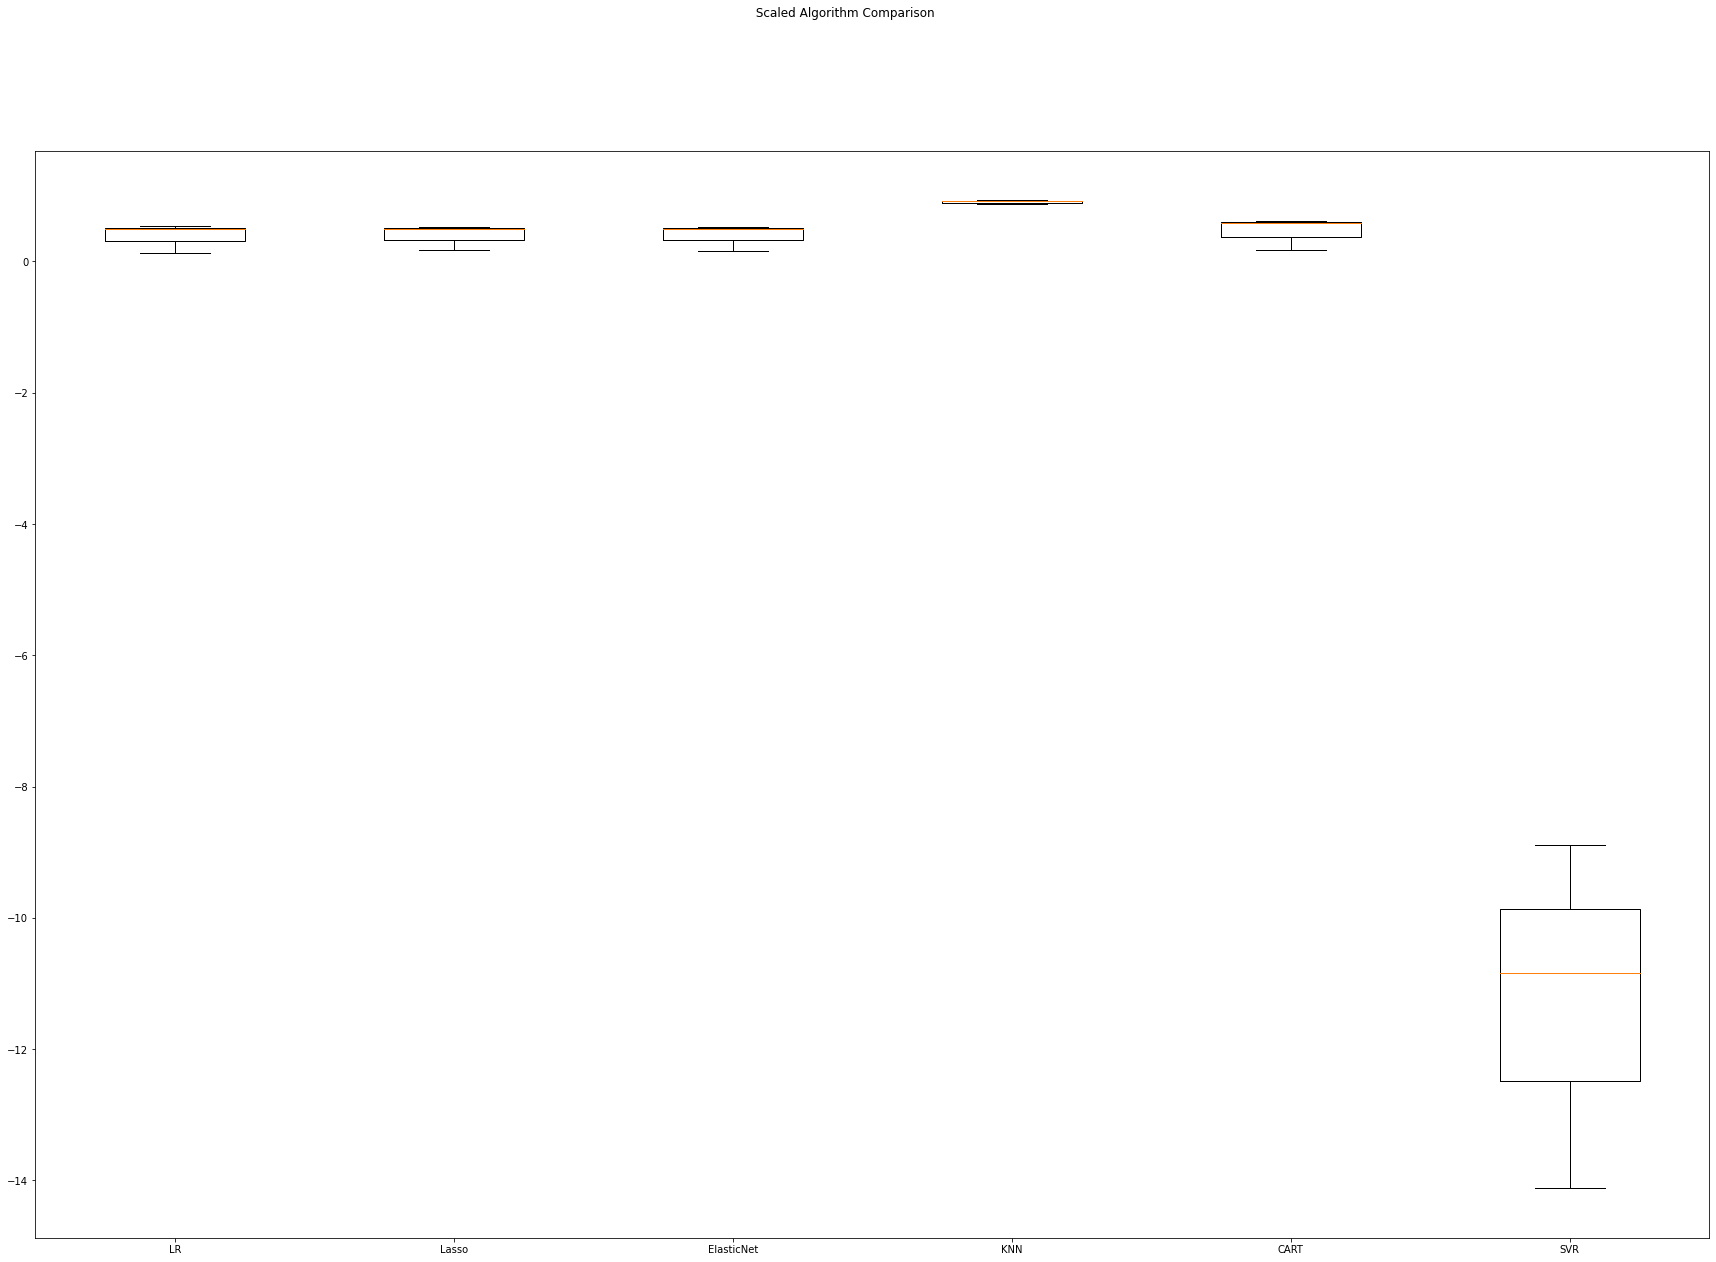

In [14]:
fig = plt.figure()
fig.suptitle(' Scaled Algorithm Comparison ')
ax = fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()

plt.rcParams['figure.figsize']=(30,20)

#algorithm comparison

In [15]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=20,random_state=5)
model.fit(x_train, y_train)
predictions=model.predict(x_val)

print(r2(y_val,predictions))


0.45556234479189617


In [16]:
scaler = st().fit(x_train)
rescaledx = scaler.transform(x_train)
model = gbr(random_state=seed, n_estimators=100)
model.fit(rescaledx, y_train)

rescaledValidationx = scaler.transform(x_val)
predictions = model.predict(rescaledValidationx)
print(r2(y_val, predictions))

0.9481390660395402


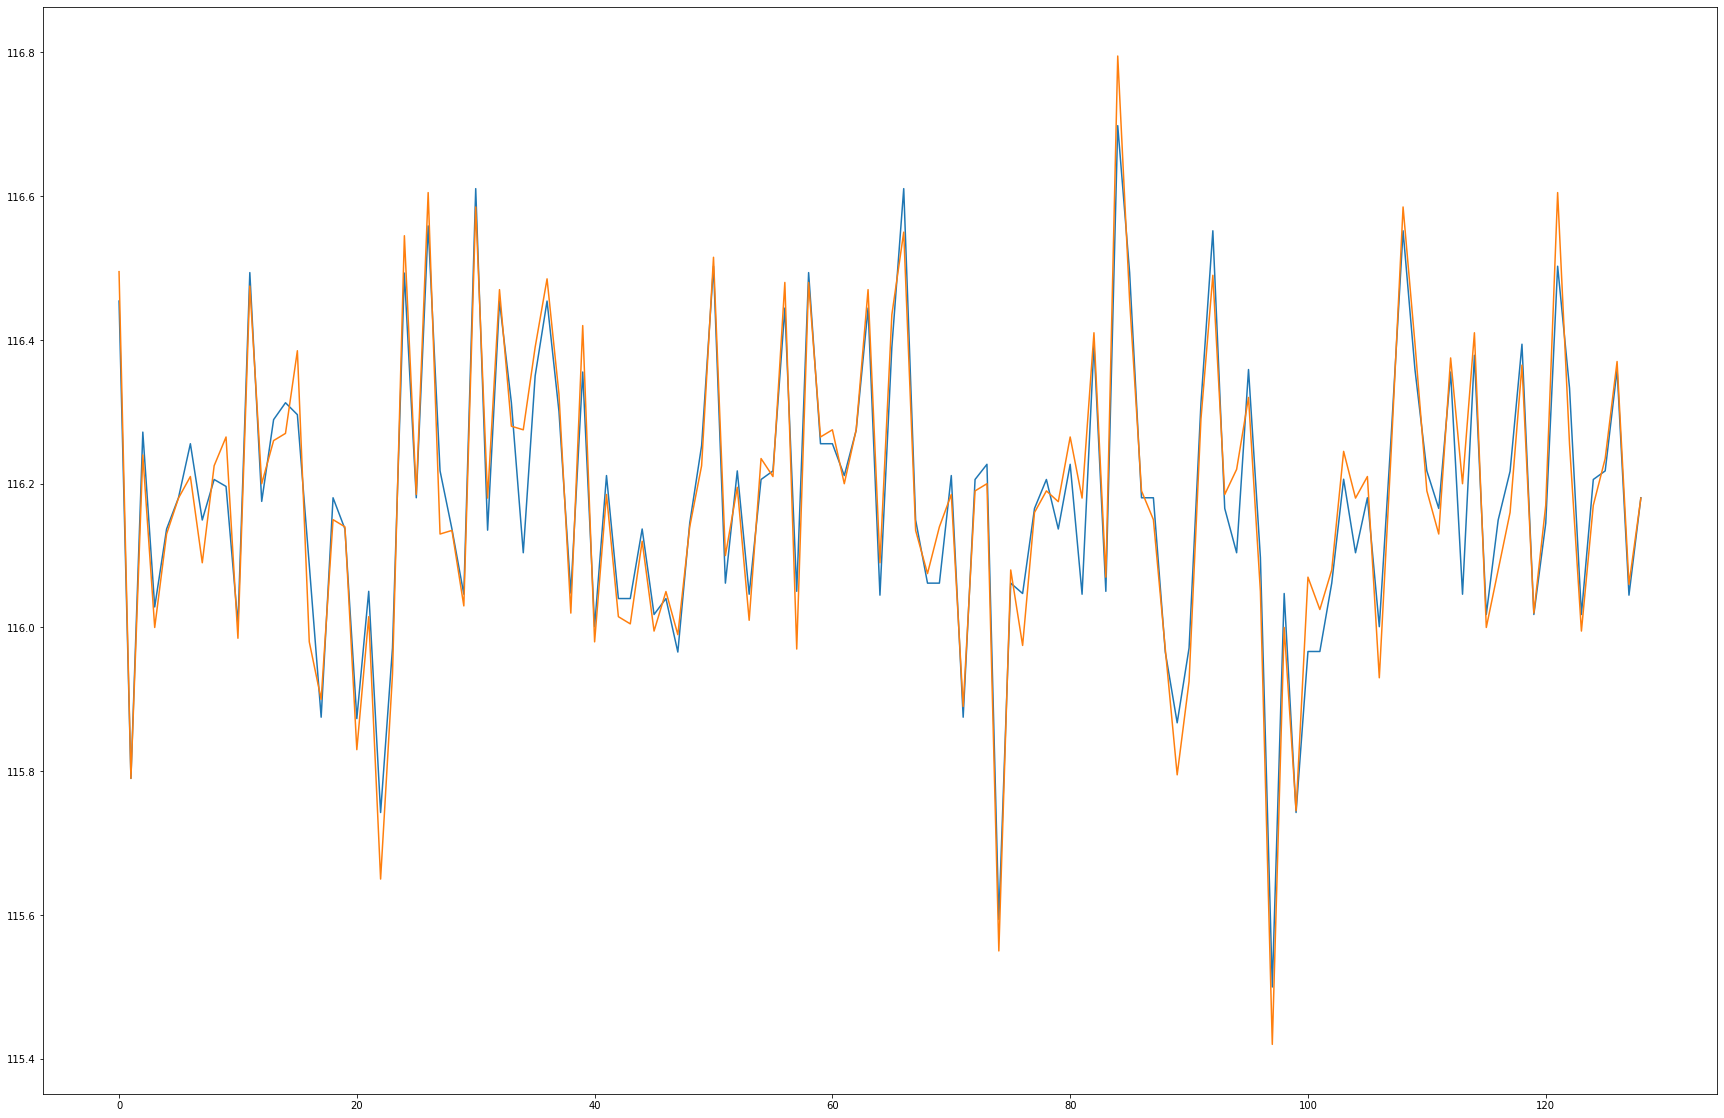

In [17]:
plt.plot(predictions)
plt.plot(y_val)

plt.rcParams['figure.figsize']=(50,25)
plt.show()

# orange- original
# blue- prediction

In [18]:
#using k nearest neighbours

model = knn(n_neighbors=5)

model.fit(x_train, y_train)

predict = model.predict(x_val)
print(r2(y_val, predict))

0.950480055694931


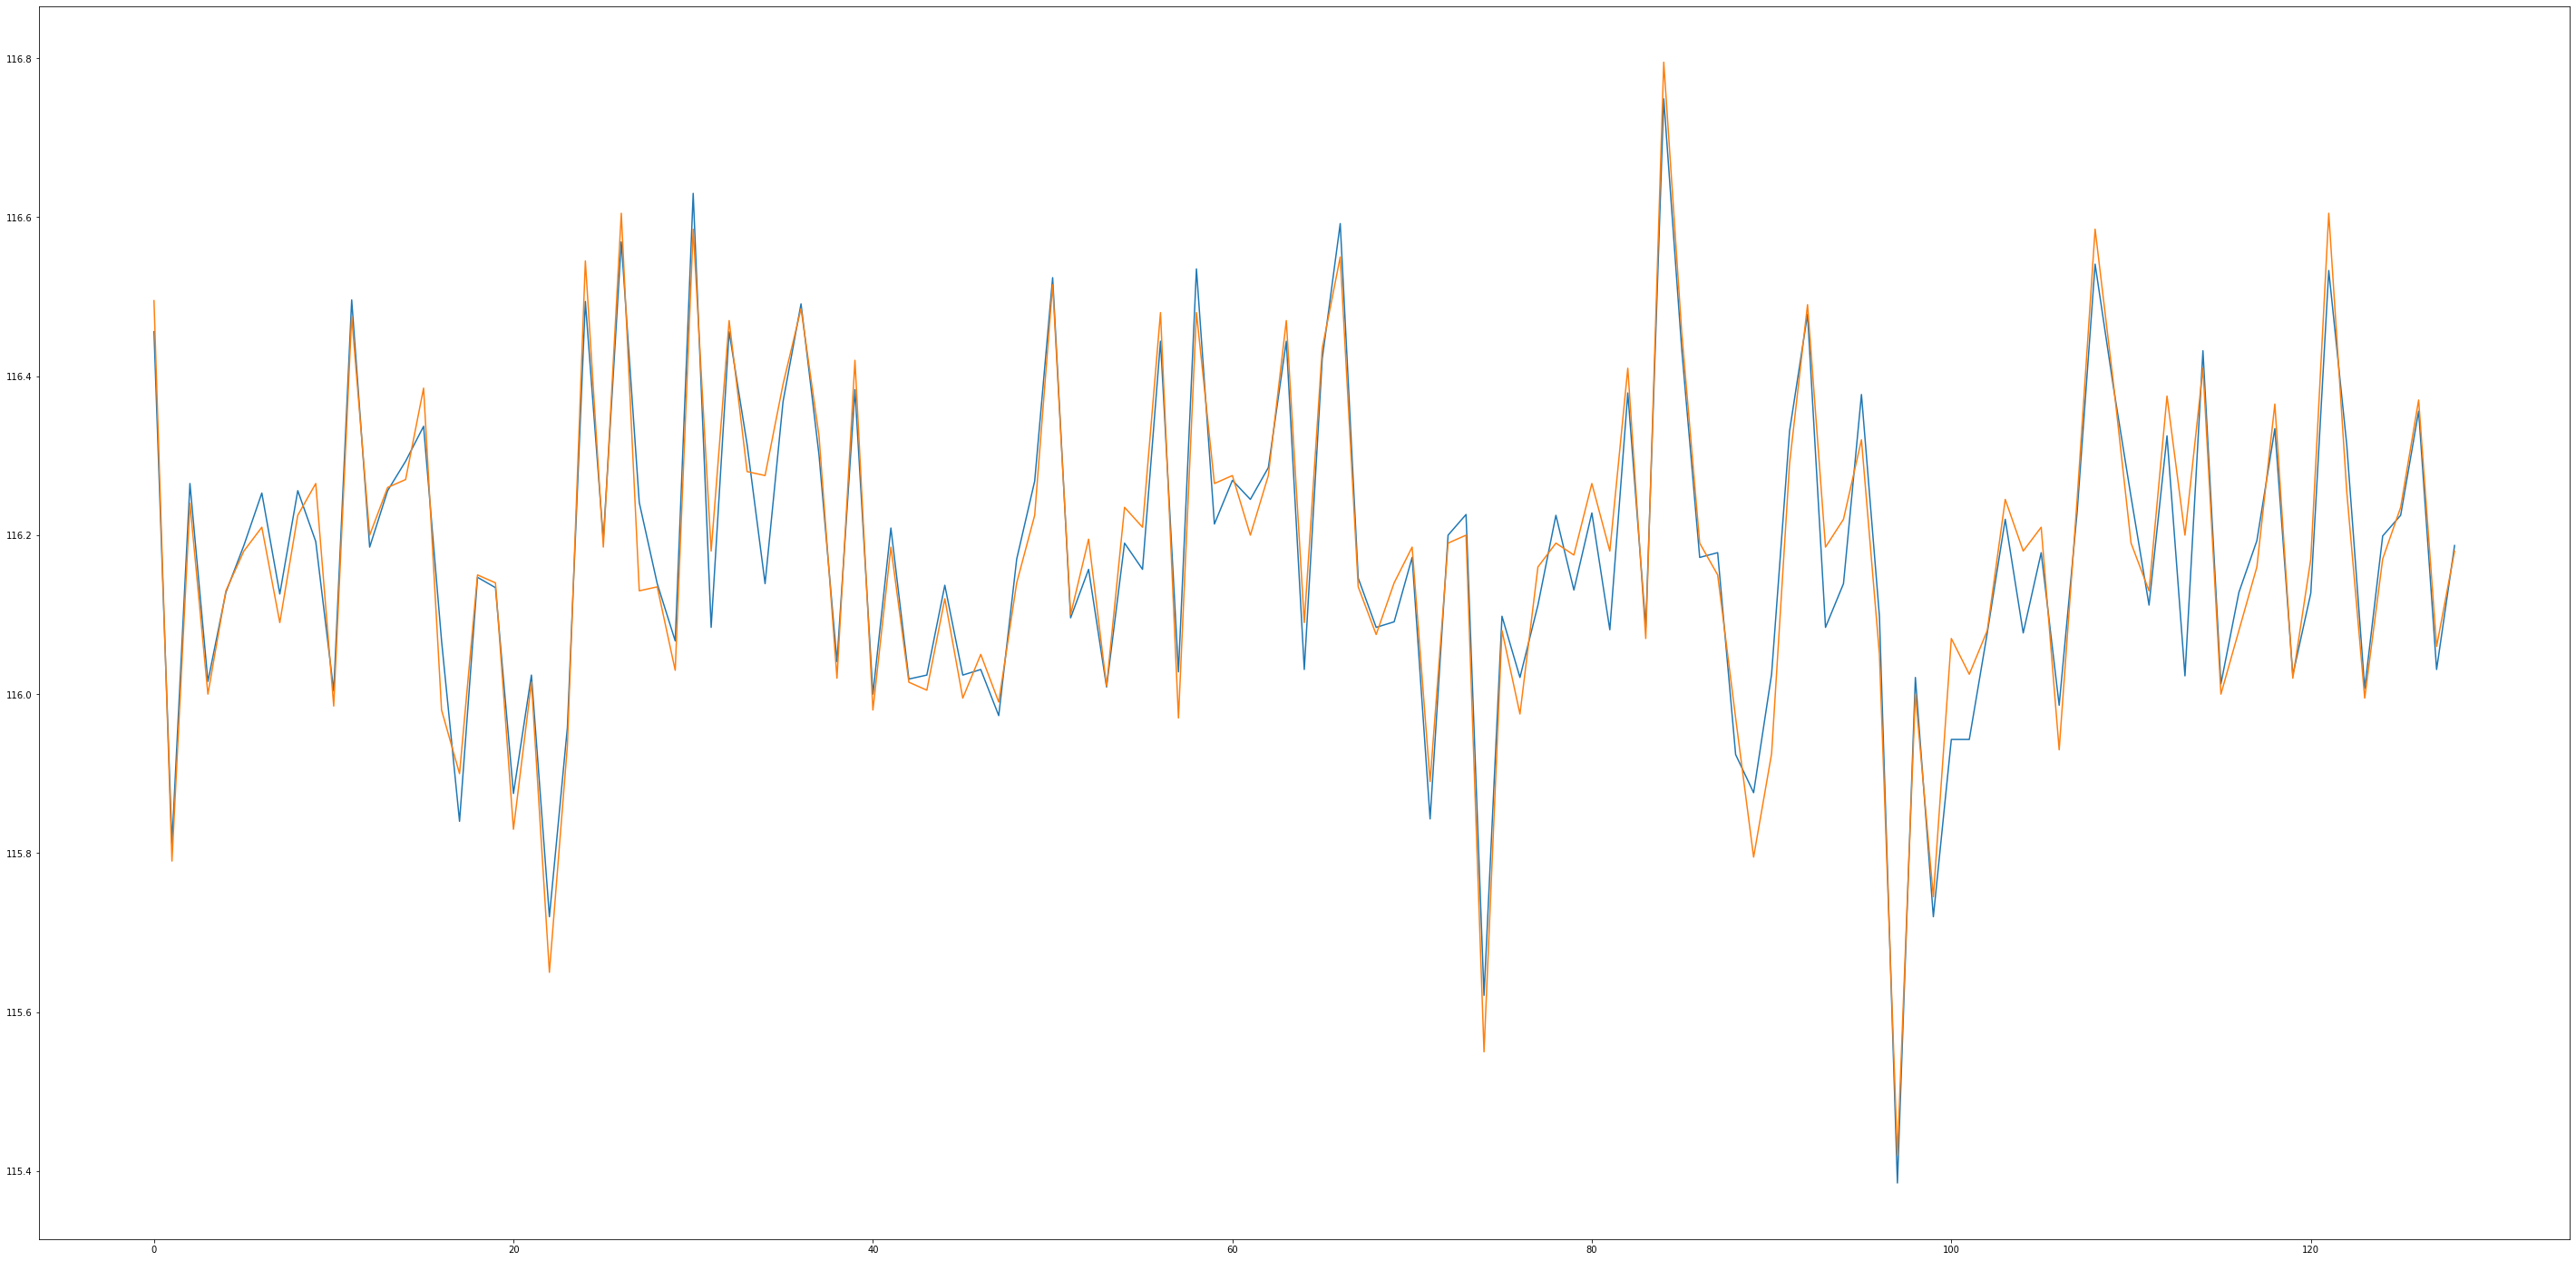

In [19]:
#plotting for knn

plt.plot(predict)
plt.plot(y_val)

plt.rcParams['figure.figsize']=(50,25)
plt.show()

# orange- original
# blue- prediction